# Assignment 1

Tugas ini menggunakan dataset tindak kriminal yang terjadi di London sepanjang tahun 2008-2016. Adapun dataset dapat diunduh melalui kaggle (https://www.kaggle.com/jboysen/london-crime).

Pertama-tama, import semua library yang sekiranya dibutuhkan dalam proses preprocessing dan visualisasi data seperti berikut:

In [1]:
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from PIL import Image
from wordcloud import WordCloud, STOPWORDS

plt.style.use('ggplot')

Selanjutnya, load dataset yang akan digunakan dengan menggunakan library pandas.

In [2]:
data = pd.read_csv(r"dataset/london_crime_by_lsoa.csv")

## Deskripsi Dataset
- lsoa_code: code for Lower Super Output Area (policing area) in Greater London
- borough: common name for London borough
- major_category: High level categorization of crime
- minor_category: low level categorization of crime within major category
- value: the count of the crime for that particular borough, in that particular month
- year: year of reported counts, 2008-2016
- month: month of reported counts, 1-12

Selanjutnya, periksa lima data pertama, lima data terakhir, ukuran, tipe data dari masing-masing kolom, dan missing values dari dataset yang telah diload.

In [3]:
data.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
data.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [5]:
data.shape

(13490604, 7)

Berdasarkan hasil di atas, dapat diketahui bahwa dataset memiliki 13.490.603 data dengan kolom/variabel sebanyak 7.

In [6]:
data['major_category'].unique()

array(['Burglary', 'Violence Against the Person', 'Robbery',
       'Theft and Handling', 'Criminal Damage', 'Drugs',
       'Fraud or Forgery', 'Other Notifiable Offences', 'Sexual Offences'],
      dtype=object)

In [7]:
data['minor_category'].unique()

array(['Burglary in Other Buildings', 'Other violence',
       'Personal Property', 'Other Theft', 'Offensive Weapon',
       'Criminal Damage To Other Building', 'Theft/Taking of Pedal Cycle',
       'Motor Vehicle Interference & Tampering',
       'Theft/Taking Of Motor Vehicle', 'Wounding/GBH',
       'Other Theft Person', 'Common Assault', 'Theft From Shops',
       'Possession Of Drugs', 'Harassment', 'Handling Stolen Goods',
       'Criminal Damage To Dwelling', 'Burglary in a Dwelling',
       'Criminal Damage To Motor Vehicle', 'Other Criminal Damage',
       'Counted per Victim', 'Going Equipped', 'Other Fraud & Forgery',
       'Assault with Injury', 'Drug Trafficking', 'Other Drugs',
       'Business Property', 'Other Notifiable', 'Other Sexual',
       'Theft From Motor Vehicle', 'Rape', 'Murder'], dtype=object)

Tindakan kriminal pada kategori minor dapat digolongkan menjadi lebih umum ke dalam kategori besar. Adapun tindak kriminal dalam kategori besar antara lain burglary (perampokan dan pengrusakan properti), violence against person (kekerasan terhadap manusia), robbery (perampokan dan kekerasan individu), theft and handling (pencurian), criminal damage (pengrusakan), drugs (obat-obatan terlarang), fraud or forgery (penipuan atau pemalsuan), sexual offences (penyerangan secara seksual), dan other notifiable offences (pelanggaran lain).

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Berdasarkan hasil di atas, 4 kolom, lsoa_code, borough, major_category, dan minor_category berupa string, sementara value, year, dan month berupa integer.

In [9]:
data.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Berdasarkan hasil di atas, dataset tidak mengandung missing values.

### 1. Sepanjang tahun 2008 - 2016, daerah manakah yang memiliki jumlah tindak kriminal paling tinggi?

Pilih kolom-kolom dan kondisi yang diperlukan seperti di bawah ini.

In [10]:
data_borough_yr = data[['year', 'borough', 'value']].groupby(['year','borough']).agg({'value': 'sum'})
data_borough_yr.head()

value
year borough                    
2008 Barking and Dagenham  17656
     Barnet                23944
     Bexley                15305
     Brent                 23504
     Bromley               24015

In [11]:
data_borough = data_borough_yr.reset_index()[['borough', 'value']].groupby(['borough']).agg({'value': 'sum'})
data_borough.head()

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349


Bentuk grafik batang berdasarkan data yang telah dibentuk.

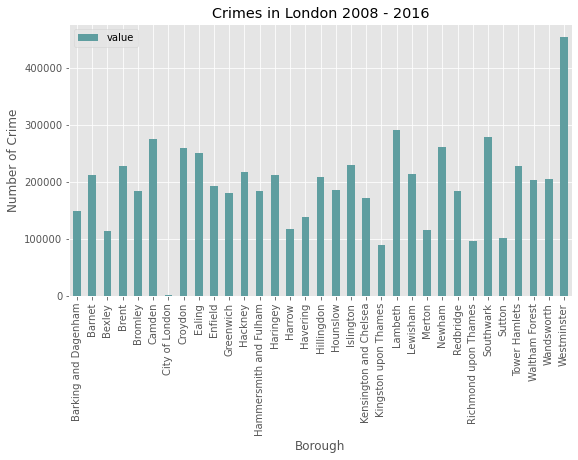

In [12]:
data_borough.plot(kind = 'bar', figsize=(9,5), color='cadetblue')

plt.title('Crimes in London 2008 - 2016')
plt.xlabel('Borough')
plt.ylabel('Number of Crime')

plt.show()

Berdasarkan hasil di atas, diketahui bahwa:
- Westminster merupakan daerah dengan kejadian tindak kriminal tertinggi di London sepanjang tahun 2008-2016 dengan angka kejadian lebih dari 400.000 kasus kriminal.
- City of London merupakan daerah dengan kejadian tindak kriminal terendah di London sepanjang tahun 2008-2016 dengan angka kejadian sangat kecil, yaitu kurang dari 10.000 kasus kriminal.

### 2. Daerah mana saja yang menjadi 5 daerah dengan tindak kriminal tertinggi sepanjang tahun 2008 - 2016?

Pertama-tama, bentuk data yang berisi 5 daerah dengan jumlah 'value' paling banyak, lalu urutkan dari besar ke kecil sebagai berikut:

In [13]:
top5_borough = data_borough.sort_values('value', ascending=False).head(5)
top5_borough

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024


Selanjutnya, bentuk pie chart untuk mengetahui perbandingan persentase kejadian tindak kriminal antara masing-masing daerah.

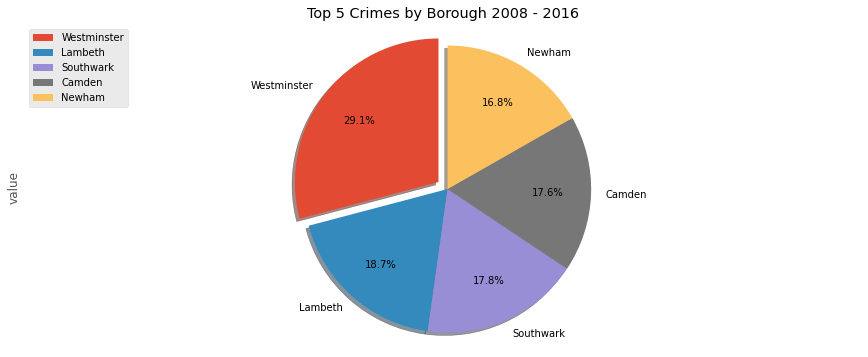

In [14]:
explode_list = [.08, 0, 0, 0, 0]
top5_borough['value'].plot(
    kind="pie",
    figsize=(15,6),
    autopct='%.1f%%',
    startangle=90,
    shadow=True,
    label=None,
    pctdistance=0.7,
    explode=explode_list
)
plt.title('Top 5 Crimes by Borough 2008 - 2016')
plt.axis('equal')
plt.legend(labels=top5_borough.index, loc='upper left')
plt.show()

Berdasarkan hasil di atas, didapat bahwa daerah Westminster, Lambeth, Southwark, Camden, dan Newham merupakan lima daerah dengan tindak kriminal tertinggi sepanjang tahun 2008-2016 dengan persentase kejadian kasus tindak kriminal secara berturut-turut adalah 29.1%, 18.7%, 17.8%, 17.6%, dan 16.8%.

Berikut disajikan peta daerah Westminster sebagai daerah dengan kasus tindak kriminal tertinggi di London sepanjang tahun 2008-2016.

In [15]:
westminster = folium.Map(location=(51.4977836,-0.1522502), zoom_start=40)
westminster

## 2. Kapan saja tindak kriminal paling banyak terjadi?

Pilih kolom-kolom dan kondisi yang diperlukan seperti di bawah ini.

In [16]:
data_grp = data.groupby(['year','month','borough']).agg({'value': 'sum'})
data_grp.head()

value
year month borough                    
2008 1     Barking and Dagenham   1615
           Barnet                 2134
           Bexley                 1346
           Brent                  2136
           Bromley                2097

Pada analisis kali ini, akan dilihat bagaimana kasus kriminal pada tahun 2016 setiap bulannya.

In [17]:
data_grp_month = data[['year','month','value']].loc[(data['year'] == 2016)]
data_grp_month = data_grp_month[['month', 'value']].groupby('month').agg({'value': 'sum'})

data_grp_month.head()

,value
month,
1,58847
2,56697
3,59167
4,58637
5,63990


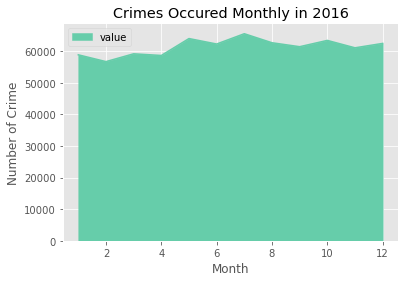

In [18]:
data_grp_month.plot.area(color='mediumaquamarine')

plt.title('Crimes Occured Monthly in 2016')
plt.xlabel('Month')
plt.ylabel('Number of Crime')

plt.show()

Berdasarkan hasil yang didapat, angka kejadian tindak kriminal sepanjang tahun 2016 setiap bulannya berada pada kisaran 50.000-60.000 kasus.

Selanjutnya, akan dilihat kasus tindak kriminal selama 9 tahun terakhir, yaitu tahun 2008-2016.

In [19]:
data_grp_year = data_grp.reset_index()[['year', 'value']].groupby(['year']).agg({'value': 'sum'})
data_grp_year.head()

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329


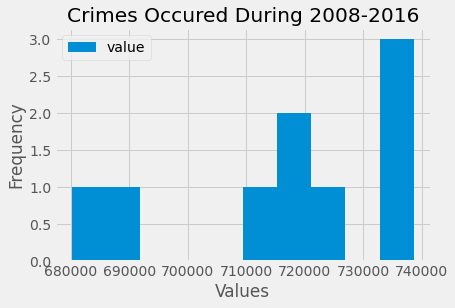

In [20]:
plt.style.use('fivethirtyeight')

data_grp_year.reset_index().plot(x='year', y='value', kind='hist', bins=10)

plt.title('Crimes Occured During 2008-2016')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.show()

Berdasarkan hasil yang diperoleh, dapat dilihat sepanjang tahun 2008-2016, angka kejadian tindak kriminal berkisar di angka 680.000-740.000 kasus setiap tahunnya.

Selanjutnya akan dilihat trend kejadian tindak kriminal sepanjang tahun 2008-2016.

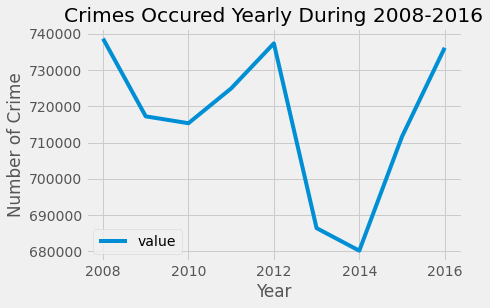

In [21]:
plt.style.use('fivethirtyeight')

data_grp_year.plot()

plt.title('Crimes Occured Yearly During 2008-2016')
plt.xlabel('Year')
plt.ylabel('Number of Crime')

plt.show()

Seperti hasil analisis pada grafik sebelumnya, terlihat pula pada grafik ini bahwa angka kejadian tindak kriminal berkisar di antara 680.000-740.000 kejadian setiap tahunnya. Adapun tindak kriminal tertinggi terjadi pada tahun 2008 dengan angka kejadian mendekati 740.000 kasus. Kasus tindak kriminal terendah terjadi pada tahun 2014 dengan angka kejadian sekitar 680.000 kasus.

Selanjutnya, akan dilihat kejadian tindak kriminal selama 5 tahun terakhir pada saat data ini diambil, yaitu tahun 2012-2016.

In [22]:
last5_year = data_grp_year.reset_index().tail(5)
last5_year

,year,value
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


Text(0, 0.5, 'Number of Crimes')

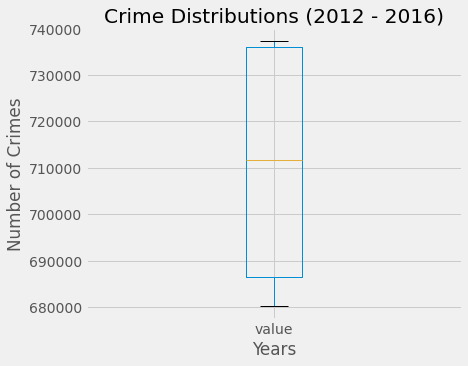

In [23]:
last5_year['value'].plot(
    kind="box",
    figsize=(6,5)
)

plt.title("Crime Distributions (2012 - 2016)")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

Berdasarkan hasil yang diperoleh, didapat bahwa angka rata-rata kejadian tindak kriminal 5 tahun terakhir, yaitu sekitar 712.000 kejadian setiap tahunnya dengan angka tertinggi kejadian hampir mencapai 740.000 kasus dan terendah sekitar 680.000 kasus.

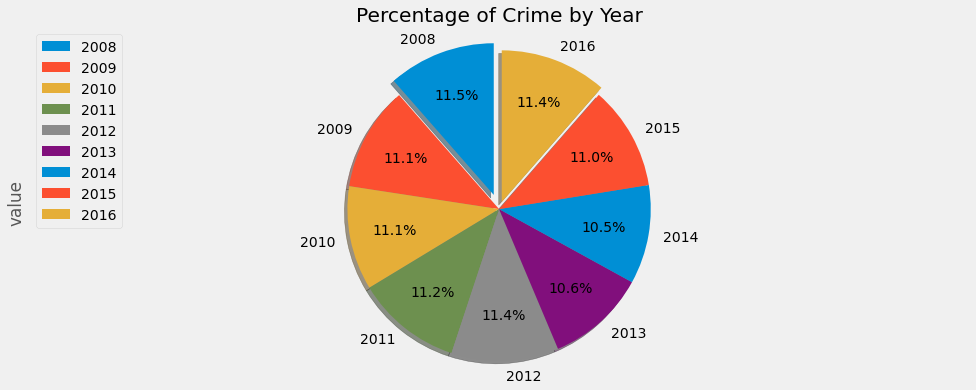

In [24]:
explode_list = [.1, 0, 0, 0, 0, 0, 0, 0, .05]
data_grp_year['value'].plot(
    kind="pie",
    figsize=(15,6),
    autopct='%.1f%%',
    startangle=90,
    shadow=True,
    label=None,
    pctdistance=0.7,
    explode=explode_list
)
plt.title('Percentage of Crime by Year')
plt.axis('equal')
plt.legend(labels=data_grp_year.index, loc='upper left')
plt.show()

Secara persentase, angka kejadian tindak kriminal sepanjang tahun 2008-2016 tidak berbeda secara signifikan karena perbedaan persentase kejadian setiap tahunnya berkisar antara 0.1%-0.5%.

## 3. Tindak kriminal kategori besar apa yang paling sering terjadi pada tahun 2016 di daerah Westminster?

Karena Westminster merupakan daerah dengan tingkat kejadian kriminal tertinggi, maka selanjutnya, akan dilihat tindak kriminal jenis apa yang paling sering terjadi di daerah Westminster pada tahun terakhir saat data ini diambil, yaitu tahun 2016.

In [25]:
data_major = data[['major_category', 'value']].groupby('major_category').agg({'value': 'sum'})
data_major.head()

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349


In [26]:
data_wm = data[['year', 'borough', 'major_category', 'value']].loc[(data['year']==2016) & (data['borough']=='Westminster')]
data_wm.head()

,year,borough,major_category,value
227,2016,Westminster,Theft and Handling,6
700,2016,Westminster,Violence Against the Person,1
798,2016,Westminster,Violence Against the Person,0
972,2016,Westminster,Theft and Handling,0
1538,2016,Westminster,Burglary,0


In [27]:
data_wm['major_category'] = data_wm['major_category'].replace(
    ['Criminal Damage', 'Fraud or Forgery', 'Other Notifiable Offences',
     'Sexual Offences', 'Violence Against the Person', 'Theft and Handling'],
    ['Damage', 'Fraud', 'Others', 'SexualOffences', 'Violence', 'Theft']
)
data_wm.head()

,year,borough,major_category,value
227,2016,Westminster,Theft,6
700,2016,Westminster,Violence,1
798,2016,Westminster,Violence,0
972,2016,Westminster,Theft,0
1538,2016,Westminster,Burglary,0


In [28]:
data_wm['word'] = (data_wm['major_category'] + (" ")) * data_wm['value']
data_wm.head()

,year,borough,major_category,value,word
227,2016,Westminster,Theft,6,Theft Theft Theft Theft Theft Theft
700,2016,Westminster,Violence,1,Violence
798,2016,Westminster,Violence,0,
972,2016,Westminster,Theft,0,
1538,2016,Westminster,Burglary,0,


In [29]:
major_list = data_wm['word'].values.tolist()
major_str = ""
#print(major_str.join(major_list)) 

for value in major_list:
    if value == "":
        major_str = major_str
    else:
        major_str += value

major_list2 = major_str.split()
major_list2 = sorted(major_list2)
word_str = ""

for value in major_list2:
    word_str += value + (" ")
        
print(word_str)

Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary B

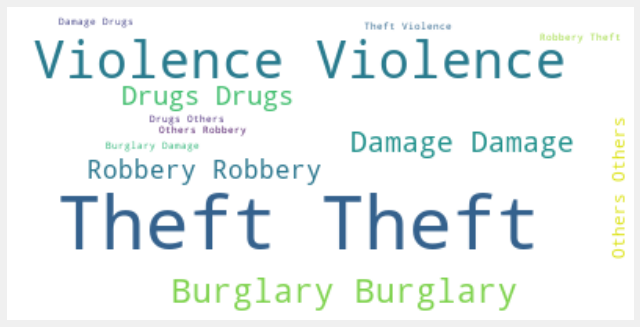

In [30]:
major_wc = WordCloud(
    background_color="white",
    max_words=5000,
    stopwords=STOPWORDS
)
major_wc.generate(word_str)

plt.figure(figsize=(10,6))
plt.imshow(major_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Berdasarkan hasil di atas, didapat bahwa tiga tindak kriminal kategori besar yang sering terjadi di Westminster pada tahun 2016 adalah Theft (pencurian), Violence (kekerasan), dan Burglary (perampokan).

## 4. Bagaimana dengan tindak kriminal kategori minor?

Berdasarkan analisis sebelumnya, tindak kriminal Theft merupakan tindak kriminal kategori besar yang sering terjadi. Maka, selanjutnya akan dilihat tindak kriminal kategori minor yang tergolong ke dalam tindak kriminal Theft (pencurian) di daerah Westminster.

In [31]:
data_wm_minor = data[['year', 'borough', 'major_category', 'minor_category', 'value']].loc[
    (data['borough']=='Westminster') & (data['major_category']=='Theft and Handling')]
data_wm_minor.head()

,year,borough,major_category,minor_category,value
21,2012,Westminster,Theft and Handling,Handling Stolen Goods,0
134,2014,Westminster,Theft and Handling,Motor Vehicle Interference & Tampering,1
165,2015,Westminster,Theft and Handling,Other Theft Person,0
187,2013,Westminster,Theft and Handling,Theft From Motor Vehicle,3
227,2016,Westminster,Theft and Handling,Theft From Motor Vehicle,6


In [32]:
data_wm_minor = data_wm_minor[['minor_category', 'year', 'value']].groupby(['year','minor_category']).agg({'value':'sum'})
data_wm_minor.head()

value
year minor_category                               
2008 Handling Stolen Goods                     105
     Motor Vehicle Interference & Tampering     31
     Other Theft                             16501
     Other Theft Person                       4121
     Theft From Motor Vehicle                 3026

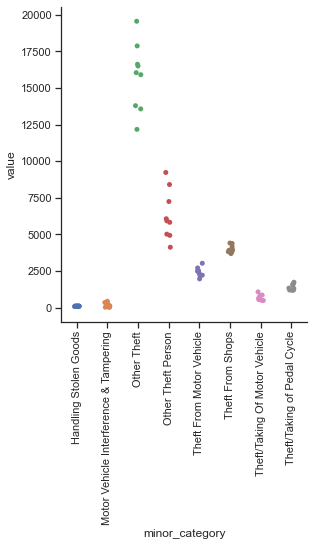

In [33]:
sns.set_theme(style="ticks", color_codes=True)
minor_plot = sns.catplot(x='minor_category', y="value", data=data_wm_minor.reset_index())
minor_plot.set_xticklabels(rotation=90)

Berdasarkan hasil yang diperoleh, didapat bahwa tindak pencurian barang, pencurian yang terjadi di kendaraan bermotor, dan pencurian di toko memiliki angka kejadian yang lebih rendah dibandingkan dengan kejadian yang tergolong ke dalam kejadian pencurian lain (Other theft dan Other theft person).

## Kesimpulan

- Berdasarkan data yang diperoleh, tindak kriminal sepanjang tahun 2008-2016 berjumlah 13.490.603 kejadian.
- Data di atas mencakup banyak kejadian tindak kriminal yang kejahatan-kejahatannya dapat dikelompokkan lebih umum ke dalam kategori besar, antara lain: burglary (perampokan dan pengrusakan properti), violence against person (kekerasan terhadap manusia), robbery (perampokan dan kekerasan individu), theft and handling (pencurian), criminal damage (pengrusakan), drugs (obat-obatan terlarang), fraud or forgery (penipuan atau pemalsuan), sexual offences (penyerangan secara seksual), dan other notifiable offences (pelanggaran lain).
- Tindak kriminal paling banyak terjadi pada tahun 2008, 2012, dan 2016
- Tindak kriminal paling banyak terjadi di daerah Westminster, Lambeth, Southwark, Camden, Newham
- Secara umum, sepanjang tahun 2008-2016, kisaran angka kejadian tindak kriminal berada pada 680.000-740.000 kasus setiap tahunnya dengan rata-rata sekitar 712.000 kejadian.
- Pada tahun 2016, secara umum terdapat tindak kriminal sebanyak 50.000-60.000 kasus setiap bulannya.
- Adapun pada tahun terakhir data ini diambil (2016) di daerah Westminster, tindak kriminal (kategori besar) yang paling sering terjadi adalah Theft (pencurian).